In [1]:
%pylab inline
import GPy

Populating the interactive namespace from numpy and matplotlib


**Expected Value of Normal Distribution**
$$E[X]=\int\limits_{-\infty}^{\infty}\frac{1}{(2\pi\sigma^2)^{1/2}} e^{- \frac{1}{2\sigma^2}(x-\mu)^2} dx = \int\limits_{-\infty}^{\infty}\frac{1}{(2\pi\sigma^2)^{1/2}} e^{- \frac{1}{2\sigma^2}(z)^2} (z+\mu) dz$$

$$E[X] = \frac{1}{(2\pi \sigma^2)^{1/2}}\int_{-\infty}^{\infty} (z+\mu) e^{-\frac{z^2}{2\sigma^2}}dz = \frac{1}{(2\pi \sigma^2)^{1/2}}\int_{-\infty}^{\infty} z e^{-\frac{z^2}{2\sigma^2}}dz + \mu \left(\frac{1}{(2\pi \sigma^2)^{1/2}}\int_{-\infty}^{\infty} e^{-\frac{z^2}{2\sigma^2}}dz\right)$$

$$E[X] = \frac{1}{(2\pi \sigma^2)^{1/2}}\int_{-\infty}^{\infty} (z+\mu) e^{-\frac{z^2}{2\sigma^2}}dz = \frac{1}{(2\pi \sigma^2)^{1/2}} \left( \int_{-\infty}^{\infty} z e^{-\frac{z^2}{2\sigma^2}}dz + \mu \int_{-\infty}^{\infty} e^{-\frac{z^2}{2\sigma^2}}dz\right)$$

$$$$

**Truncated Expected Value of Normal Distribution**
$$\frac{1}{(2\pi \sigma^2)^{1/2}}\int_{y_{best}}^{\infty} (z+\mu) e^{-\frac{z^2}{2\sigma^2}}dz = \frac{1}{\sqrt{2\pi\sigma^2}} \left( \int_{y_{best}}^{\infty} z e^{-\frac{z^2}{2\sigma^2}}dz + \mu \int_{y_{best}}^{\infty} e^{-\frac{z^2}{2\sigma^2}}dz\right)$$

$$= \frac{1}{\sqrt{2\pi\sigma^2}} \left[ -\sigma^2 e^{-\frac{z^2}{2\sigma^2}} \right]_{y_{best}}^{\infty} + \mu \big(1-\operatorname{\Phi}(y_{best})\big)$$

$$= \frac{\sigma^2}{\sqrt{2\pi\sigma^2}} \left( e^{-\frac{y_{best}^2}{2\sigma^2}} - e^{-\frac{\infty^2}{2\sigma^2}} \right) + \mu \big(1-\operatorname{\Phi}(y_{best})\big)$$

$$= \frac{\sigma}{\sqrt{2\pi}}  e^{-\frac{y_{best}^2}{2\sigma^2}} + \mu \big(1-\operatorname{\Phi}(y_{best})\big)$$
$$
= \sigma^2 \mathcal{N}\big(y_{best}\big|0,\sigma^2\big) + \mu \big(1-\operatorname{\Phi}(y_{best})\big)
$$

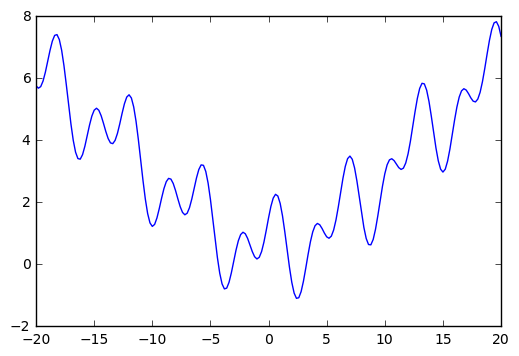

In [10]:
f = lambda x : sin(x*2) + 1.5  + cos(x) - sin(x/5+1.5) + x**2 / 100
x = linspace(-20,20,201)
plot(x,f(x));

  rbf.         |  value  |  constraints  |  priors
  variance     |    1.0  |      +ve      |        
  lengthscale  |    1.0  |      +ve      |        
press - 
  rbf.         |          value  |  constraints  |  priors
  variance     |  2.22935769058  |      +ve      |        
  lengthscale  |  47.5730476864  |      +ve      |        
press - 


 /usr/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


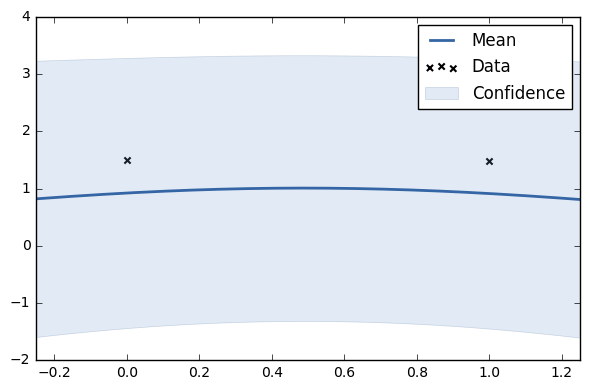

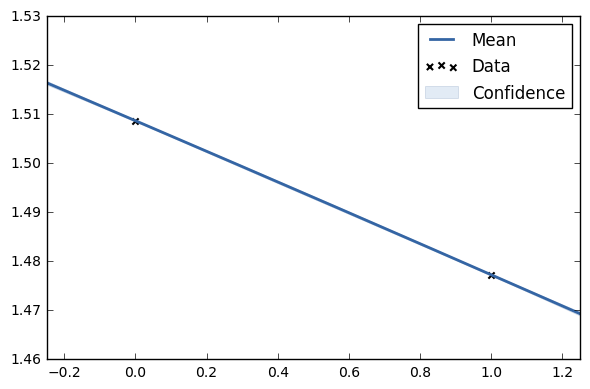

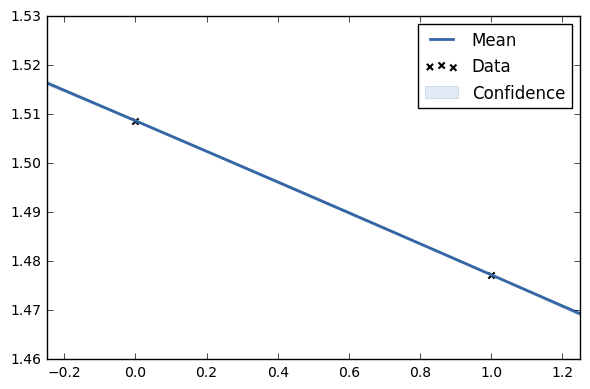

In [8]:
n = 2
X = rand(n)*12
Y = f(X) + randn(n)*0.5
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

kernel = GPy.kern.RBF(input_dim=1, variance = 1., lengthscale= 1.)
sample = [0,1]

X = array(sample).reshape(-1,1)
Y = f(X) + randn(len(X),1)*0.5
m = GPy.models.GPRegression(X, Y, kernel)
m.plot()

for i in range(n):
    
    print(kernel)
    
    m = GPy.models.GPRegression(X, Y, kernel)
    m.optimize()
    m.plot()
    input('press - ')
    

In [ ]:
n = 100
X = rand(n)*12
Y = + randn(n)*0.5

X = X.reshape(-1,1)
Y = Y.reshape(-1,1)
kernel = GPy.kern.RBF(input_dim=1, variance = 1., lengthscale= 1.)
m = GPy.models.GPRegression(X, Y, kernel)

scatter(X,Y);
x = linspace(X.min(), X.max(), 101).reshape(-1,1)
y_mean1, y_var1 = m.predict(x)
plot(x, y_mean1)
m.optimize()
y_mean2, y_var2 = m.predict(x)
plot(x, y_mean2);
legend(['not optimized', 'optimized']);
print(mean(y_var1), mean(y_var2))

In [ ]:
m.predict?

In [9]:
randn(3,1)

array([[ 0.42426003],
       [-0.63818112],
       [ 2.41109539]])